<a href="https://colab.research.google.com/github/rrfsantos/Airbnb-Segmentacao-dos-principais-assuntos-das-reviews/blob/main/DecisionTreeClassifier_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the gender of a person based on his/her first name with the help of DecisionTreeClassifier.

A name => Classifier => Male/Female

In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import matplotlib as mp

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(0)

The dataset basically contains the first names of babies born in USA from 1880 to 2016.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/linkedin/'
os.chdir(workdir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('NationalNames.csv')
df.drop_duplicates("Name")

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825414,1825415,Zichen,2014,M,5
1825415,1825416,Ziden,2014,M,5
1825418,1825419,Zijun,2014,M,5
1825419,1825420,Zilas,2014,M,5


In [4]:
m=0
f=0
for x in range(len(df['Gender'])):
    if(df['Gender'][x]=='F'):
        f+=1
    else:
        m+=1

This dataset contains naming trends for babies born in the United States and is sanitized, but we do have to perform one more cleaning operation, which is what you see on the second line.

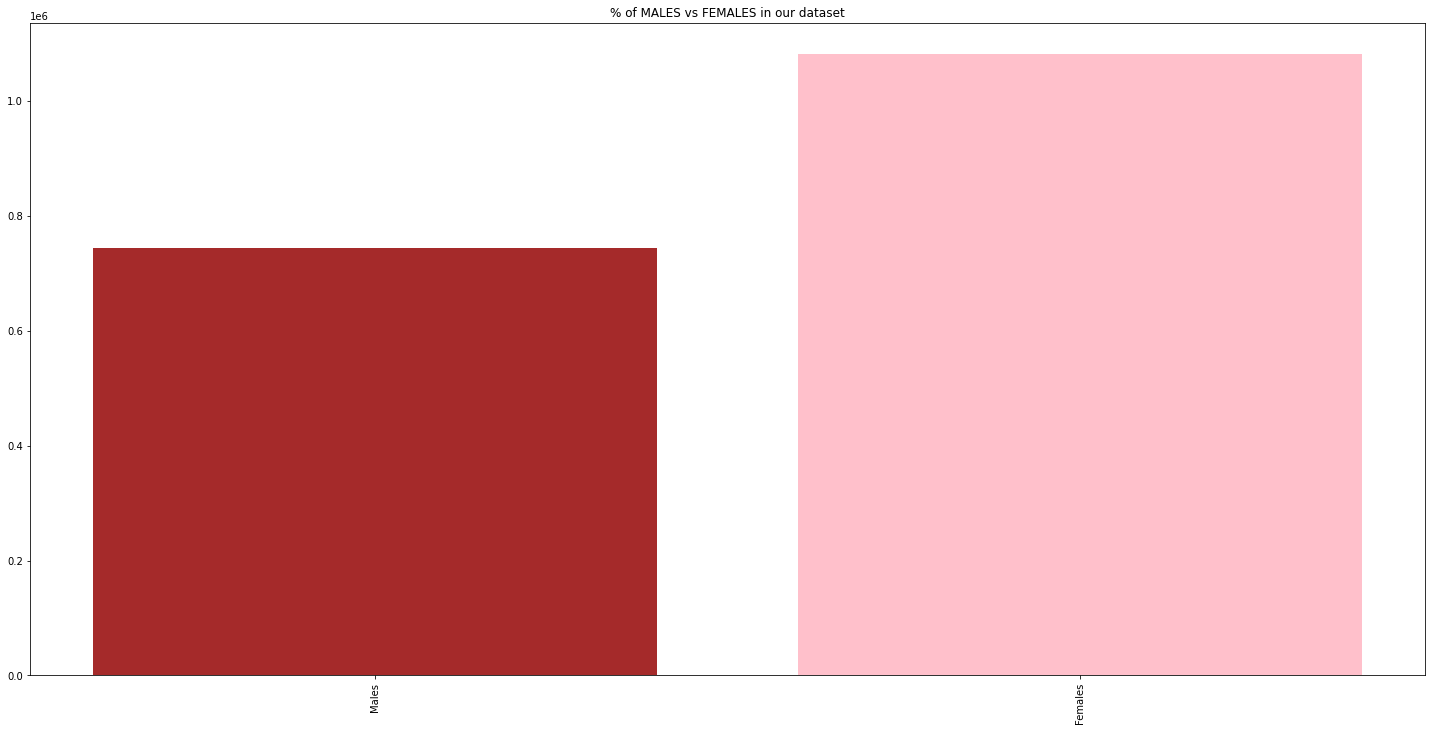

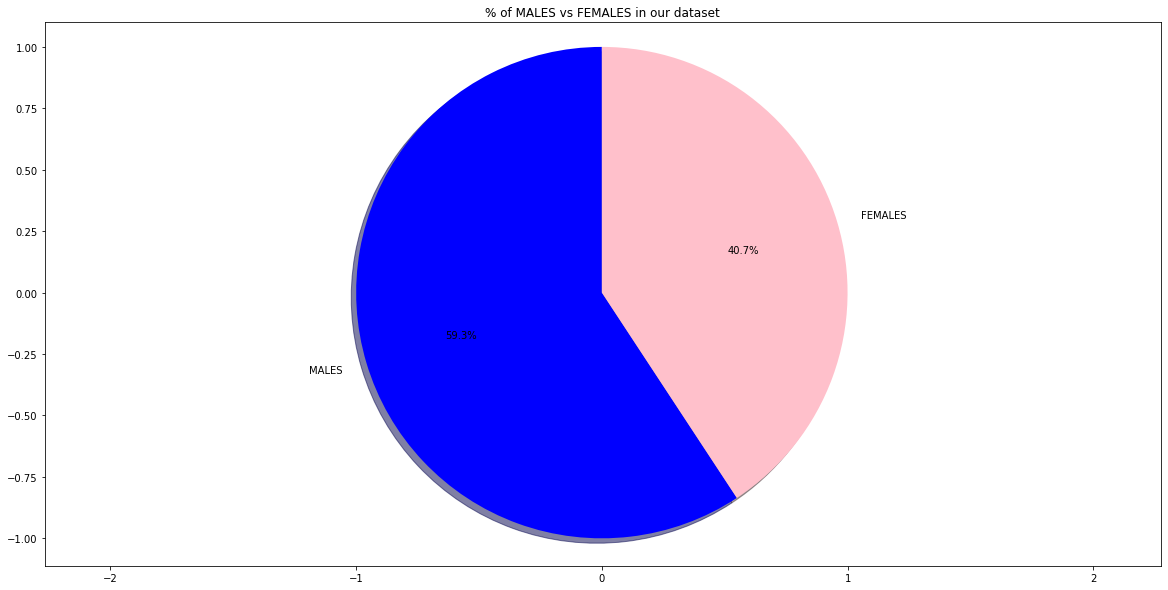

In [5]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(["Males","Females"],[m,f],color=['Brown','Pink'])
plt.title("% of MALES vs FEMALES in our dataset")
plt.xticks(rotation=90)
plt.show()

fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES','FEMALES']
ax1.pie([f,m], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","pink"])
ax1.set_title("% of MALES vs FEMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Next, we'll select the information that we think is most relevant for our classification. What we want is to pick a column that best represents whether a name is male or female.

Unfortunately, with the existing dataset, there’s no definite way to determine whether a name is male or female, so we should go ahead and create a new column to better classify gender.
So lets look for ways on how could we diffrentiate names on basis of gender.

# A decent trend in this analysis maybe this, the names of females often tend to end with a vowel. Lets analyse this
.

In [6]:
def checkVowelEnd(name):
    if name[-1] in "aeiou":
        return "Vowel End"
    return "Consonant End"
df["Vowel/Consonant End"] = df["Name"].apply(checkVowelEnd)
df.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End
0,1,Mary,1880,F,7065,Consonant End
1,2,Anna,1880,F,2604,Vowel End
2,3,Emma,1880,F,2003,Vowel End
3,4,Elizabeth,1880,F,1939,Consonant End
4,5,Minnie,1880,F,1746,Vowel End


# The new data set looks something Like this.

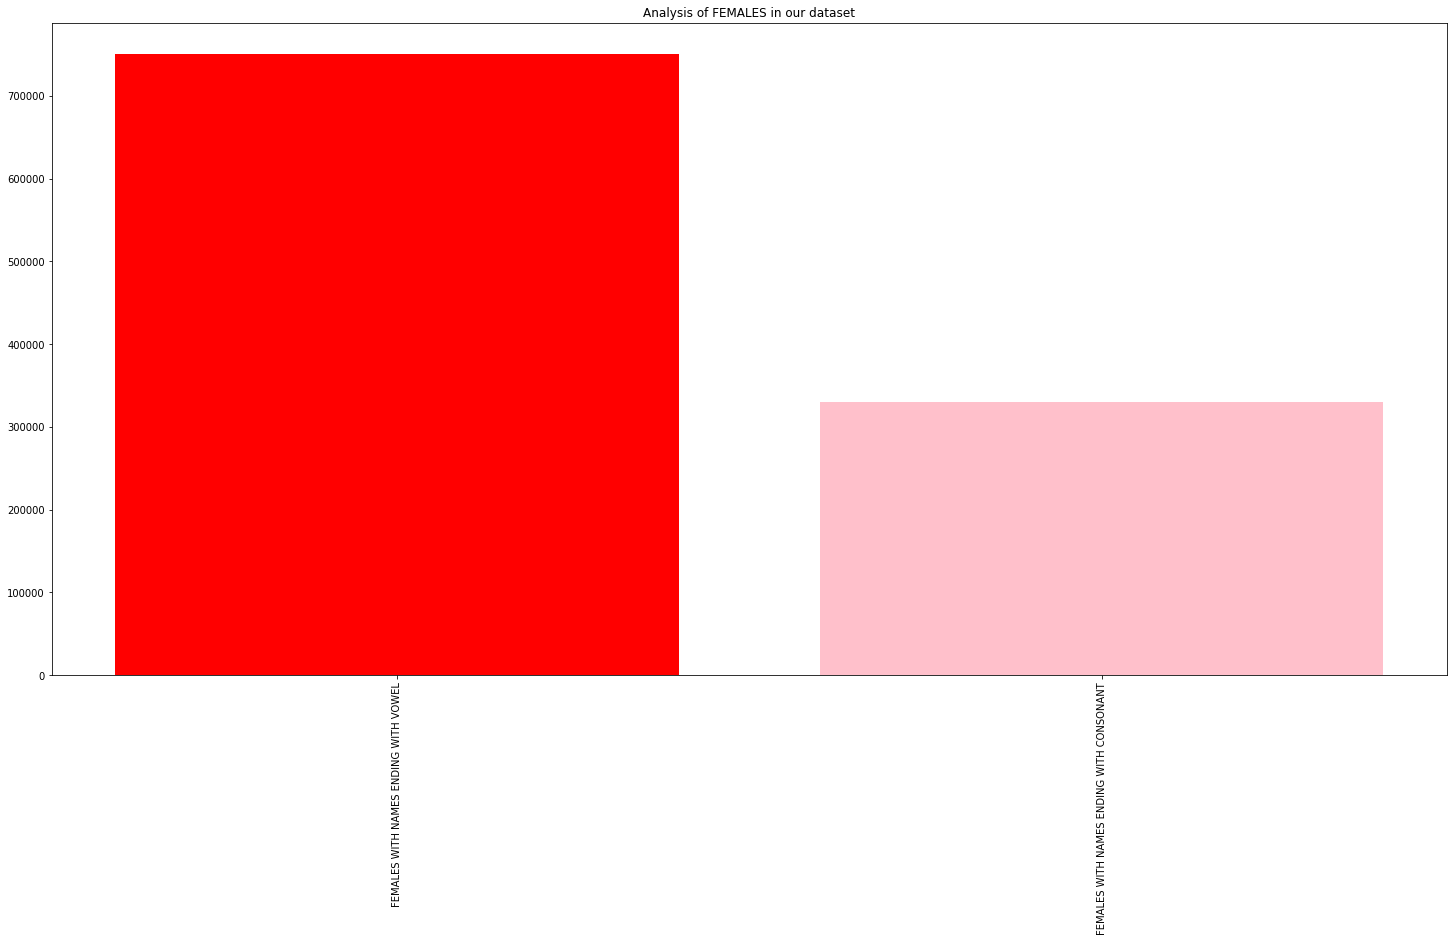

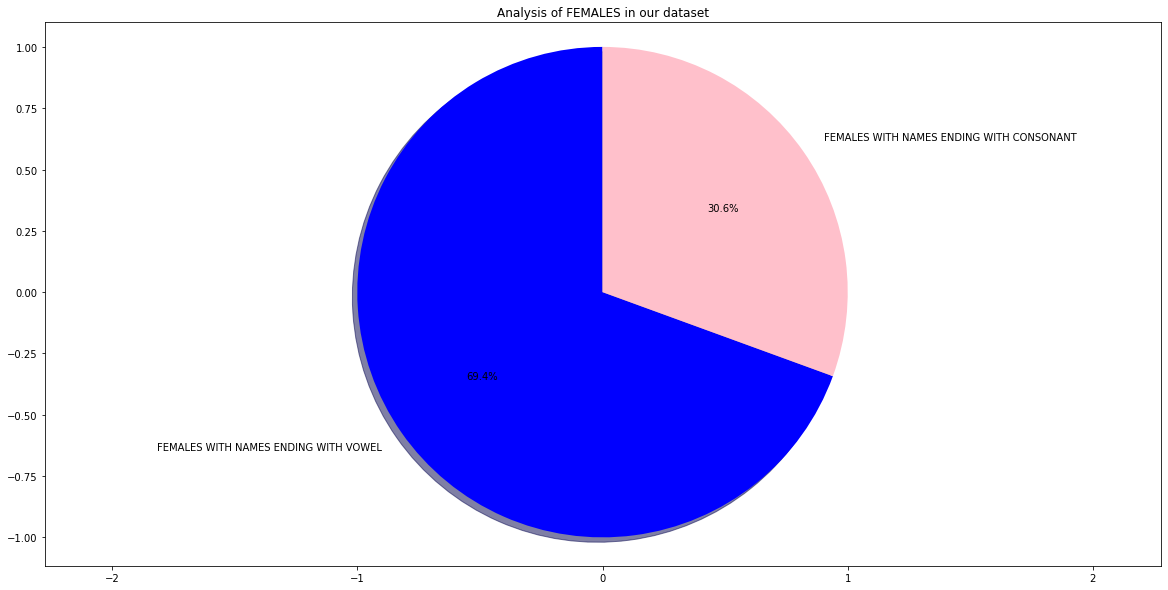

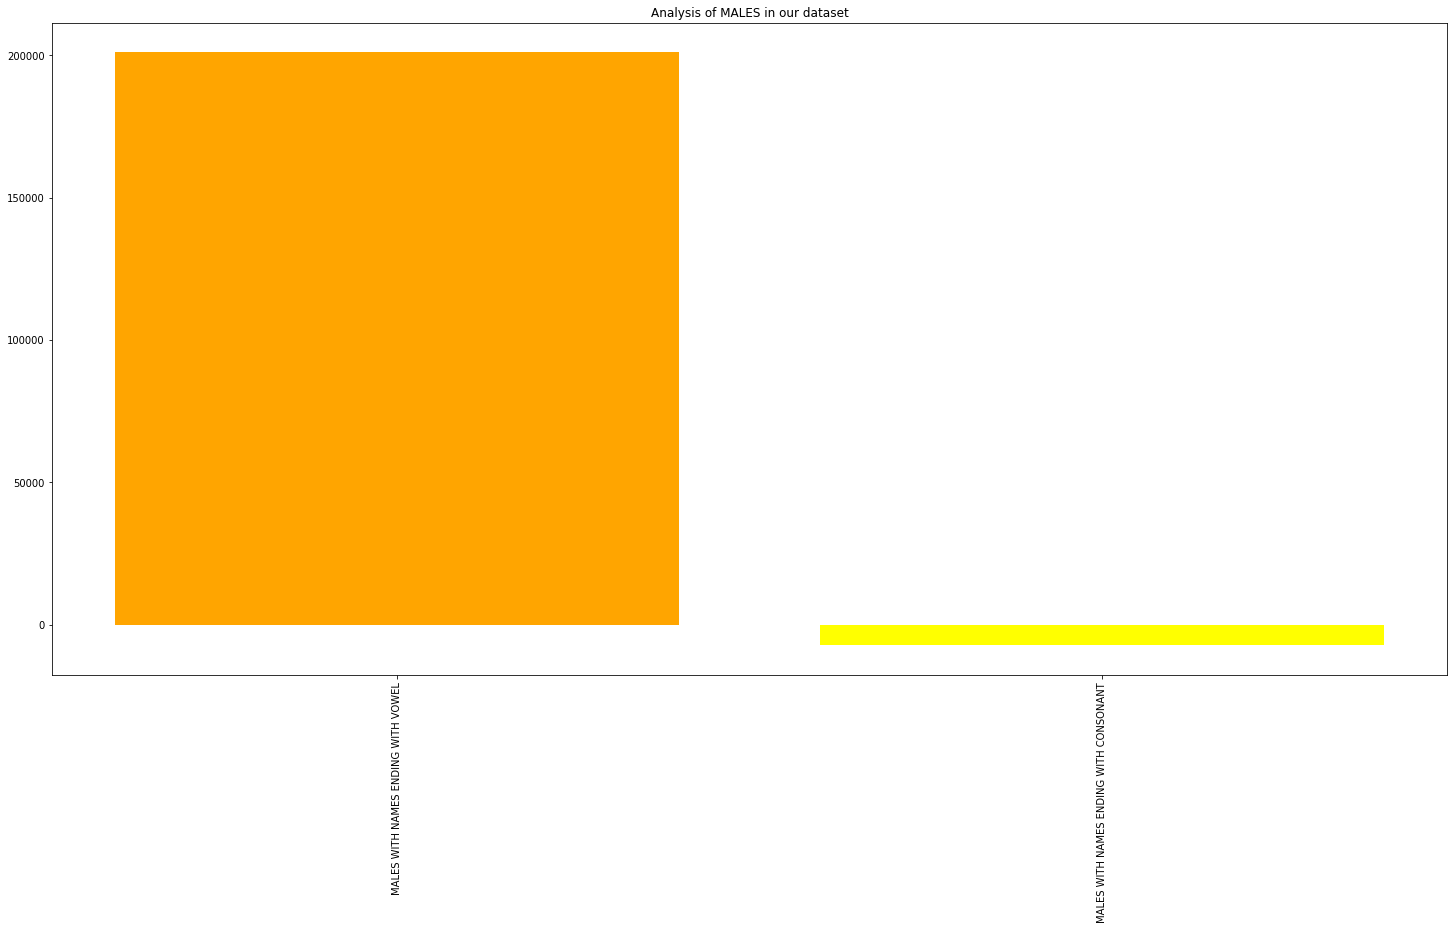

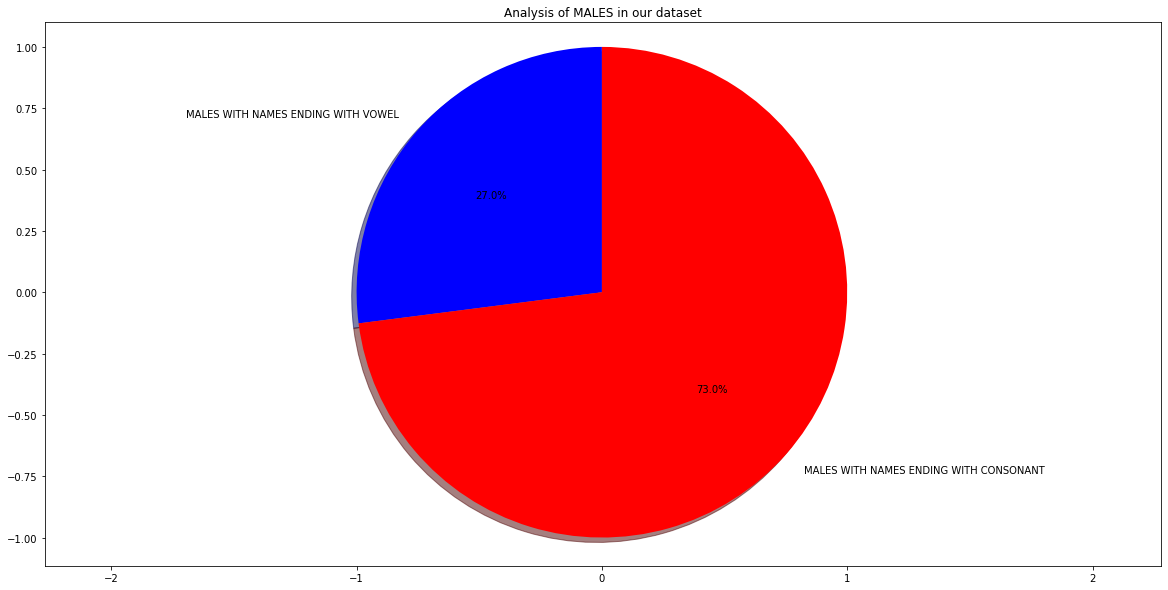

In [7]:
vend=0
mend=0
for x in range(len(df['Gender'])):
                      
    if(df['Gender'][x]=='F' and df['Vowel/Consonant End'][x]=='Vowel End'):
        vend+=1
    if(df['Gender'][x]=='M' and df['Vowel/Consonant End'][x]=='Vowel End'):
        mend+=1


fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['FEMALES WITH NAMES ENDING WITH VOWEL','FEMALES WITH NAMES ENDING WITH CONSONANT'],[vend,f-vend],color=['Red','Pink'])
plt.title("Analysis of FEMALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['FEMALES WITH NAMES ENDING WITH VOWEL','FEMALES WITH NAMES ENDING WITH CONSONANT']
ax1.pie([vend,f-vend], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","pink"])
ax1.set_title("Analysis of FEMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['MALES WITH NAMES ENDING WITH VOWEL','MALES WITH NAMES ENDING WITH CONSONANT'],[mend,m-vend],color=['Orange','Yellow'])
plt.title("Analysis of MALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES WITH NAMES ENDING WITH VOWEL','MALES WITH NAMES ENDING WITH CONSONANT']
ax1.pie([mend,m-mend], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","Red"])
ax1.set_title("Analysis of MALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### We can clearly see that around 70% of females have their names ending with a vowel and similarly 73% of males have their names ending with a consonant. So this classifying basis is quite appropriate for the analysis and predicting the gender , so we shall keep the column.

### The next we move over to the analysis of names having a vowel at start.

In [8]:
def vowelConsonantStart(name):
    
    if name[0] in "aeiou" or name[0] in "AEIOU":
        return "Vowel Start"
    return "Consonant Start"

df["Vowel/Consonant Start"] = df["Name"].apply(vowelConsonantStart)

The dataframe would look something like this after this analysis. 
Now lets see whether this basis is appropriate for classification or not.

In [9]:
fcnst=0
fvst=0
mvst=0
mcnst=0
for x in range(len(df['Gender'])):
                      
    if(df['Gender'][x]=='F' and df['Vowel/Consonant Start'][x]=='Consonant Start'):
        fcnst+=1
    if(df['Gender'][x]=='F' and df['Vowel/Consonant Start'][x]=='Vowel Start'):
        fvst+=1
    if(df['Gender'][x]=='M' and df['Vowel/Consonant Start'][x]=='Consonant Start'):
        mcnst+=1
    if(df['Gender'][x]=='M' and df['Vowel/Consonant Start'][x]=='Vowel Start'):
        mvst+=1

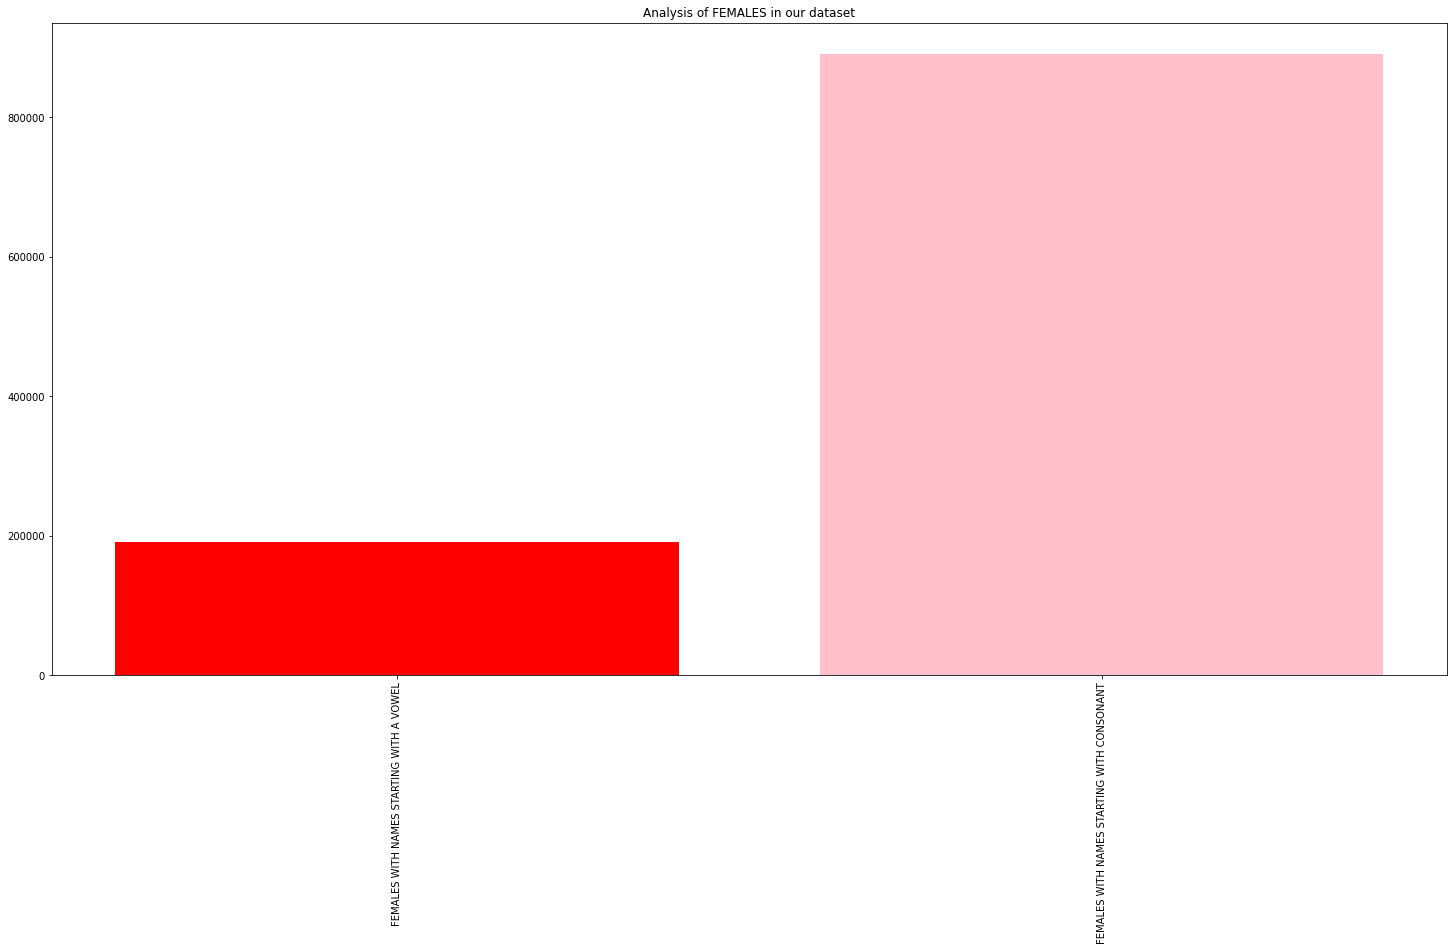

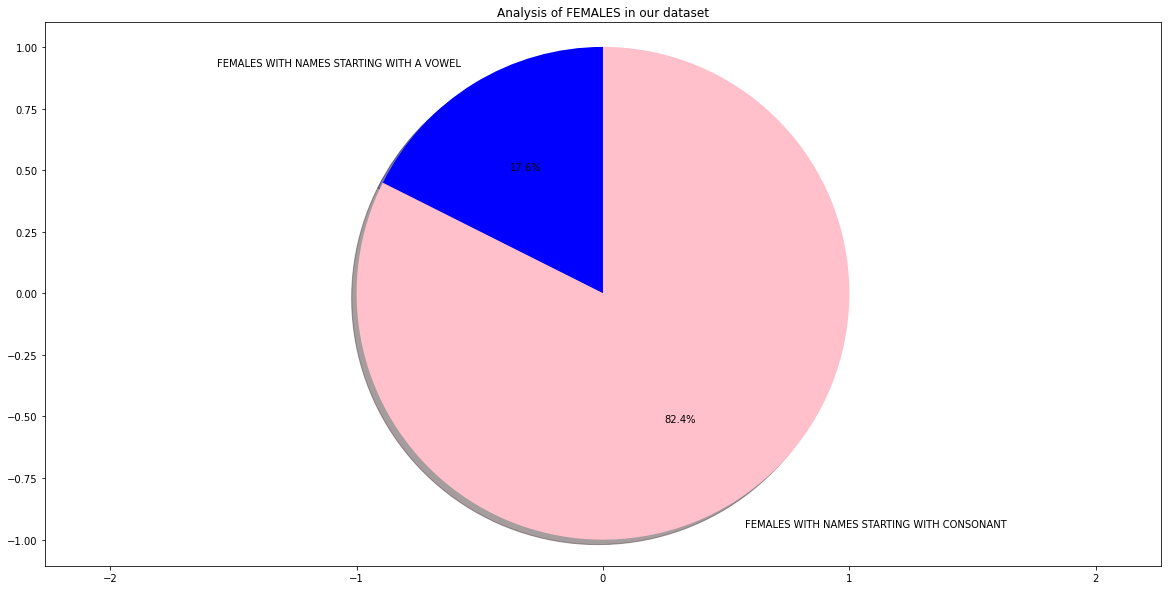

In [10]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['FEMALES WITH NAMES STARTING WITH A VOWEL','FEMALES WITH NAMES STARTING WITH CONSONANT'],[fvst,f-fvst],color=['Red','Pink'])
plt.title("Analysis of FEMALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['FEMALES WITH NAMES STARTING WITH A VOWEL','FEMALES WITH NAMES STARTING WITH CONSONANT']
ax1.pie([fvst,f-fvst], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","pink"])
ax1.set_title("Analysis of FEMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The % of consonant starting female names is quite high i.e. 82.4.

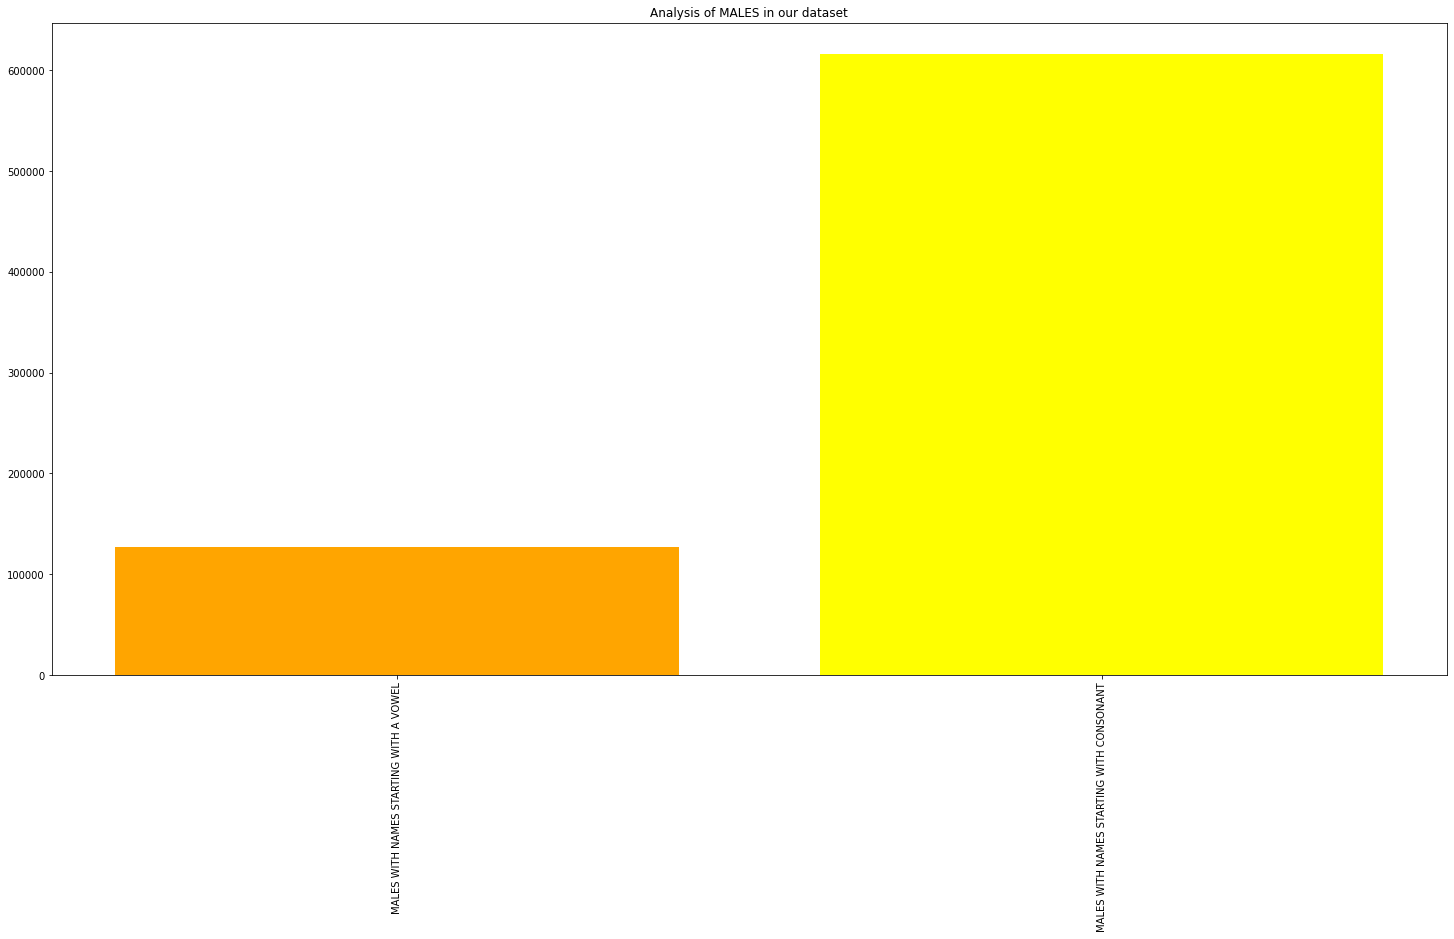

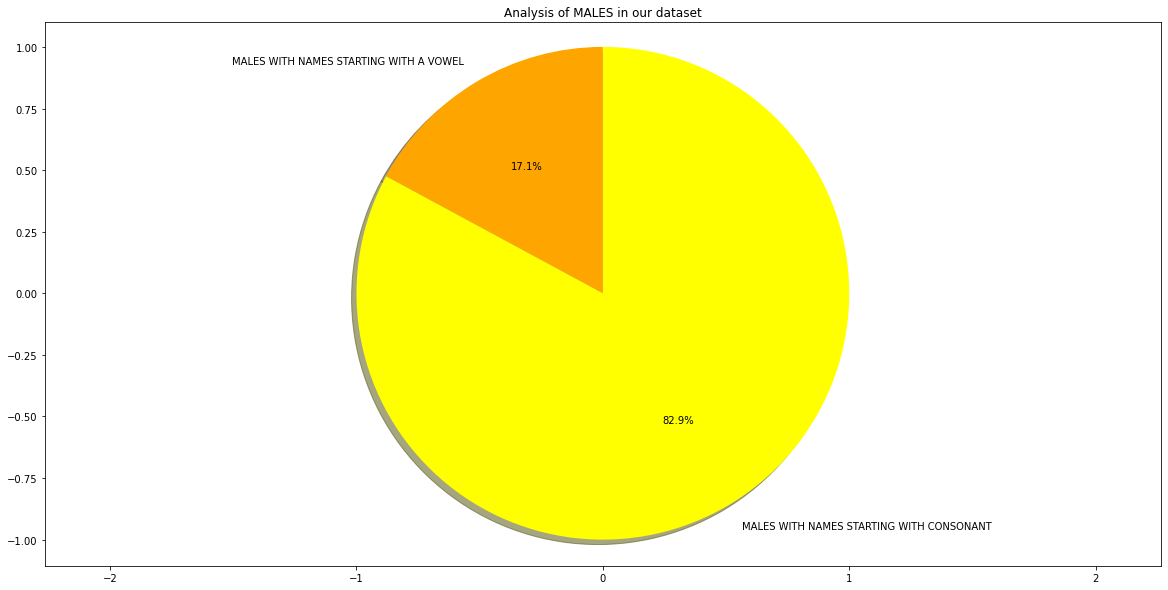

In [11]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['MALES WITH NAMES STARTING WITH A VOWEL','MALES WITH NAMES STARTING WITH CONSONANT'],[mvst,m-mvst],color=['Orange','Yellow'])
plt.title("Analysis of MALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES WITH NAMES STARTING WITH A VOWEL','MALES WITH NAMES STARTING WITH CONSONANT']
ax1.pie([mvst,m-mvst], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=['Orange','Yellow'])
ax1.set_title("Analysis of MALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The % of consonant starting male names is quite high i.e. 82.9  and that of females is also around 80% so we tend to drop this basis of classification.

This basis of classification may not be appropriate for the analysis but once we are done , we shall use this too cause it might shoot up the accuracy.
### But currently we will not be using this basis for our classification

### One last basis could be the length of the names.

Femals names are mostly short in length as compared to male names. Lets check.

In [12]:
avg_length=0
for x in df['Name']:
    avg_length=avg_length+len(x)
avg_length=avg_length/len(df['Name'])
print(" The average length of names for our dataset is: "+(str)(avg_length))

 The average length of names for our dataset is: 6.174095680312561


Lest keep the markdown basis at 7.

In [13]:
vsl=0
msl=0
def shortLongName(name):
    if len(name) < 7:
        return "Short"
    return "Long"

df["Short/Long Name"] = df["Name"].apply(shortLongName)        

In [14]:
for x in range(len(df['Gender'])):
    if(df['Gender'][x]=='F' and df['Short/Long Name'][x]=="Short" ):
        vsl+=1
    if(df['Gender'][x]=='M' and df['Short/Long Name'][x]=="Short" ):
        msl+=1

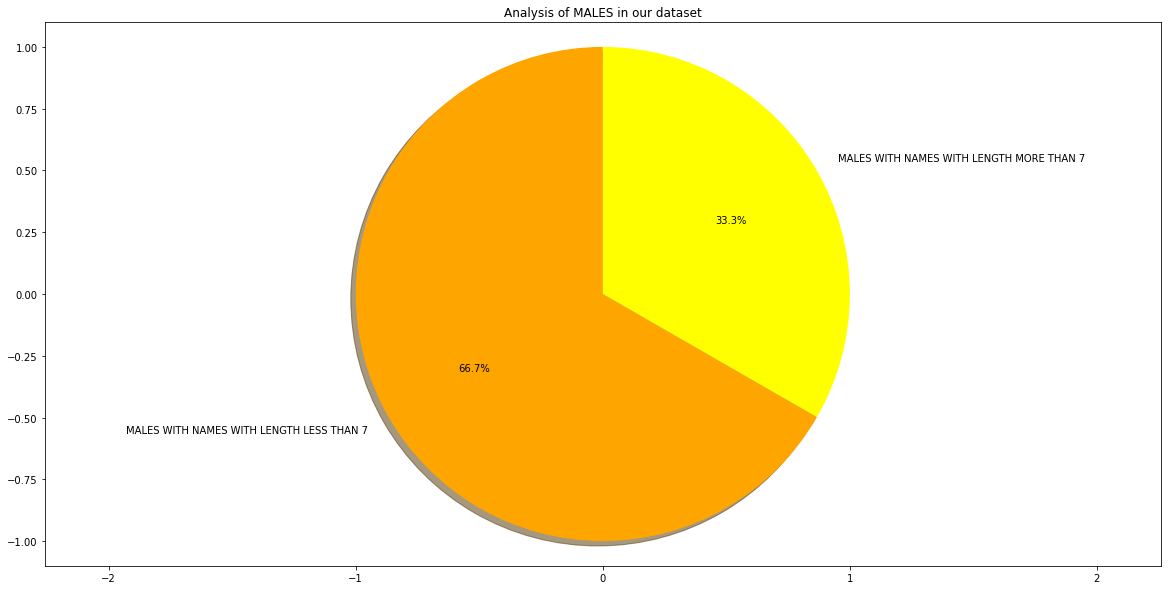

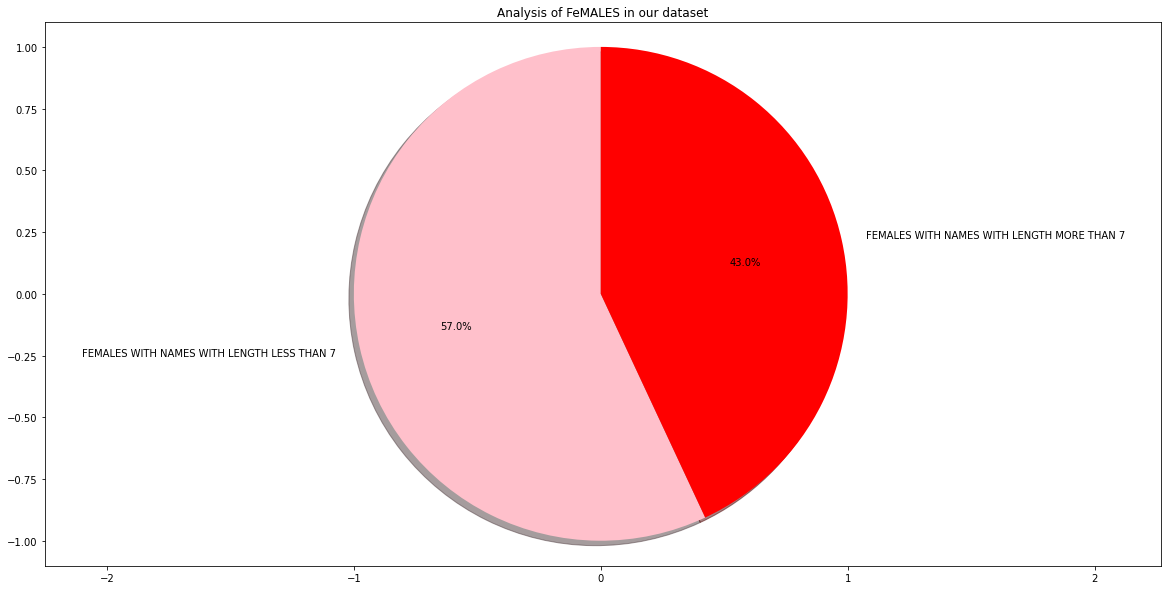

In [15]:
fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES WITH NAMES WITH LENGTH LESS THAN 7','MALES WITH NAMES WITH LENGTH MORE THAN 7']
ax1.pie([msl,m-msl], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=['Orange','Yellow'])
ax1.set_title("Analysis of MALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

fig1, ax1 = plt.subplots(figsize=(20,10))
names=['FEMALES WITH NAMES WITH LENGTH LESS THAN 7','FEMALES WITH NAMES WITH LENGTH MORE THAN 7']
ax1.pie([vsl,f-vsl], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=['Pink','Red'])
ax1.set_title("Analysis of FeMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The difference between the names with short and long lengths is quite high.


# >>>>>> PREDICTION - *DecisionTreeClassifier* <<<<<<

In [16]:
df = pd.get_dummies(df, columns=['Gender','Vowel/Consonant End','Short/Long Name'], drop_first=True)

Data frame after getting categorical values as dummies.

In [17]:
train, test = train_test_split(df, test_size = 0.20)

In [18]:
X_train = train[['Vowel/Consonant End_Vowel End','Short/Long Name_Short','Year']]
X_test = test[['Vowel/Consonant End_Vowel End','Short/Long Name_Short','Year']]
y_train = train['Gender_M']
y_test = test['Gender_M']

In [19]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 16)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print('Acurácia do modelo DecisionTreeClassifier:',acc_decision_tree, "\n")

# Matrix de Confusão
print(pd.crosstab(y_test, y_pred, rownames=["Real"], colnames=["Predict"], margins=True))

# Classification Report
report = (classification_report(y_test, y_pred, output_dict=True))
df_class_report = pd.DataFrame(report).transpose()
df_class_report.to_csv('/content/drive/MyDrive/linkedin/decision_tree.csv', encoding='utf-8')


Acurácia do modelo DecisionTreeClassifier: 70.89 

Predict       0       1     All
Real                           
0        151876   64335  216211
1         42157  106719  148876
All      194033  171054  365087


In [20]:
test['Predicted Gender'] = y_pred.tolist()
test = test.replace({'Predicted Gender': {1: 'M', 0: 'F'}})
test = test.replace({'Gender_M': {1: 'M', 0: 'F'}})
test.rename({'Gender_M': 'Gender'}, axis=1, inplace=True)

In [24]:
df_predicted = test[['Name', 'Gender', 'Predicted Gender']]
df_predicted.to_csv('Predicted Gender.csv', index=False)
df_predicted.head(30)

,Name,Gender,Predicted Gender
127597,Evart,M,M
1261627,Deniss,F,M
779004,Leda,F,F
186103,Arthur,M,M
1516348,Khevin,M,M
190256,Mcadoo,M,F
358449,Ray,F,M
75438,Stephen,M,M
1620921,Alyis,M,M
1313154,Kiari,F,F
